In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [171]:
#Import Fairfax data
df = pd.read_csv('Fairfax_VA_dinner_7mi.csv')

In [172]:
#Drop unnamed
df = df.drop('Unnamed: 0', axis=1)

In [173]:
#Drop duplicates
df = df.drop_duplicates(subset = 'name')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 0 to 798
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             618 non-null    object 
 1   alias          618 non-null    object 
 2   name           618 non-null    object 
 3   image_url      618 non-null    object 
 4   is_closed      618 non-null    bool   
 5   url            618 non-null    object 
 6   review_count   618 non-null    int64  
 7   categories     618 non-null    object 
 8   rating         618 non-null    float64
 9   coordinates    618 non-null    object 
 10  transactions   618 non-null    object 
 11  price          567 non-null    object 
 12  location       618 non-null    object 
 13  phone          606 non-null    float64
 14  display_phone  606 non-null    object 
 15  distance       618 non-null    float64
 16  address        618 non-null    object 
 17  state          618 non-null    object 
 18  city      

In [175]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,address,state,city,zip_code,genre,category1,category2,category3,transactions1,transactions2,transactions3
0,yj1SHHhbW9-qmTXjofvZKQ,21-great-american-bistro-fairfax,21 Great American Bistro,https://s3-media3.fl.yelpcdn.com/bphoto/_DfN54...,False,https://www.yelp.com/biz/21-great-american-bis...,557,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 38.8467363, 'longitude': -77.3054...",['delivery'],$$,"{'address1': '10427 North St', 'address2': 'St...",1.703591e+10,(703) 591-0146,1374.147099,"['10427 North St', 'Ste 102', 'Fairfax, VA 220...",VA,Fairfax,22030,"['American (New)', 'Cocktail Bars']",American (New),Cocktail Bars,NaN,delivery,NaN,NaN
1,0SyL4Rsx6OA7I9u55Gpk5A,happy-thai-fairfax-3,Happy Thai,https://s3-media3.fl.yelpcdn.com/bphoto/Pt3Qr0...,False,https://www.yelp.com/biz/happy-thai-fairfax-3?...,37,"[{'alias': 'thai', 'title': 'Thai'}]",5.0,"{'latitude': 38.874117, 'longitude': -77.237528}","['pickup', 'delivery']",NaN,"{'address1': '8444 Lee Hwy', 'address2': '', '...",1.571378e+10,(571) 378-0071,7046.031431,"['8444 Lee Hwy', 'Fairfax, VA 22031']",VA,Fairfax,22031,['Thai'],Thai,NaN,NaN,pickup,delivery,NaN
2,ppmmV1FCM5vtjLe8rmzr1A,clarity-vienna,Clarity,https://s3-media2.fl.yelpcdn.com/bphoto/tlQOx0...,False,https://www.yelp.com/biz/clarity-vienna?adjust...,884,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 38.90929, 'longitude': -77.25661}","['delivery', 'restaurant_reservation']",$$$,"{'address1': '442 Maple Ave E', 'address2': ''...",1.703540e+10,(703) 539-8400,7806.753078,"['442 Maple Ave E', 'Vienna, VA 22180']",VA,Vienna,22180,"['American (New)', 'Wine Bars', 'Whiskey Bars']",American (New),Wine Bars,Whiskey Bars,delivery,restaurant_reservation,NaN
3,eNDpiaho5bAf9Tx1c7TcQg,choong-man-chicken-fairfax-fairfax-3,Choong Man Chicken - Fairfax,https://s3-media4.fl.yelpcdn.com/bphoto/XjKA7p...,False,https://www.yelp.com/biz/choong-man-chicken-fa...,435,"[{'alias': 'chicken_wings', 'title': 'Chicken ...",4.5,"{'latitude': 38.86676, 'longitude': -77.27454}","['pickup', 'delivery']",$$,"{'address1': '9528 Lee Hwy', 'address2': '', '...",1.703772e+10,(703) 772-0072,3740.989609,"['9528 Lee Hwy', 'Fairfax, VA 22031']",VA,Fairfax,22031,"['Chicken Wings', 'Korean']",Chicken Wings,Korean,NaN,pickup,delivery,NaN
4,aCIOBhQUFZX2xn6JEkUTyg,meokja-meokja-fairfax-5,Meokja Meokja,https://s3-media4.fl.yelpcdn.com/bphoto/jeeHLj...,False,https://www.yelp.com/biz/meokja-meokja-fairfax...,492,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.5,"{'latitude': 38.8642119, 'longitude': -77.2768...","['pickup', 'delivery']",$$,"{'address1': '9619 Fairfax Blvd', 'address2': ...",1.571459e+10,(571) 459-2875,3449.782403,"['9619 Fairfax Blvd', 'Fairfax, VA 22030']",VA,Fairfax,22030,"['Korean', 'Barbeque']",Korean,Barbeque,NaN,pickup,delivery,NaN


In [176]:
df.describe()

,review_count,rating,phone,distance,zip_code
count,618.000000,618.000000,6.060000e+02,618.000000,618.000000
mean,233.807443,3.698220,1.685936e+10,6888.296297,21805.624595
std,257.798132,0.574256,5.715490e+08,3579.882190,668.495203
min,1.000000,1.500000,1.202559e+10,34.393351,20124.000000
25%,66.000000,3.500000,1.703268e+10,3703.892353,22030.000000
50%,159.500000,3.500000,1.703429e+10,7446.287716,22031.000000
75%,293.500000,4.000000,1.703691e+10,10100.116761,22102.000000
max,2557.000000,5.000000,1.917816e+10,14238.334238,22182.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 0 to 798
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             618 non-null    object 
 1   alias          618 non-null    object 
 2   name           618 non-null    object 
 3   image_url      618 non-null    object 
 4   is_closed      618 non-null    bool   
 5   url            618 non-null    object 
 6   review_count   618 non-null    int64  
 7   categories     618 non-null    object 
 8   rating         618 non-null    float64
 9   coordinates    618 non-null    object 
 10  transactions   618 non-null    object 
 11  price          567 non-null    object 
 12  location       618 non-null    object 
 13  phone          606 non-null    float64
 14  display_phone  606 non-null    object 
 15  distance       618 non-null    float64
 16  address        618 non-null    object 
 17  state          618 non-null    object 
 18  city      

In [178]:
df.isnull().any()

id               False
alias            False
name             False
image_url        False
is_closed        False
url              False
review_count     False
categories       False
rating           False
coordinates      False
transactions     False
price             True
location         False
phone             True
display_phone     True
distance         False
address          False
state            False
city             False
zip_code         False
genre            False
category1        False
category2         True
category3         True
transactions1     True
transactions2     True
transactions3     True
dtype: bool

In [179]:
#Drop columns not needed for analysis
df = df.drop(['id', 'alias', 'image_url', 'phone'], axis=1)

# EDA
- Distribution of review counts
- Price distribution
- Rating distribution
- City value counts
- Categories distribution
- is_closed value_counts()

Note: 
- Each restaurant has three kind of transactions (delivery, pick uprestaurant_reservation)
- Each restaurant can have up to three categories associated with the genre.

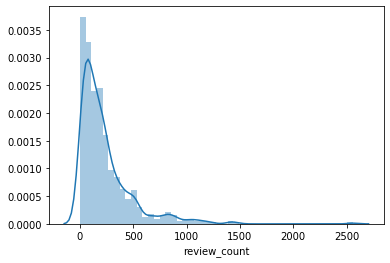

In [180]:
sns.distplot(df['review_count'])

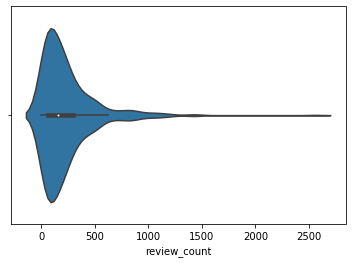

In [181]:
sns.violinplot(df['review_count'])

In [182]:
#Change price
price_dict = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4, np.nan: 'nan'}
df['price'] = df['price'].apply(lambda x: price_dict[x])

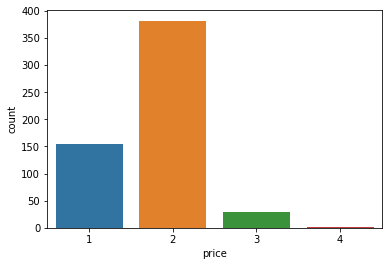

In [183]:
sns.countplot(df['price'], order = [1, 2, 3, 4])

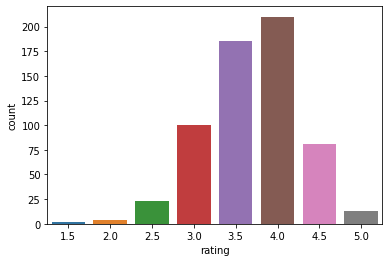

In [184]:
sns.countplot(df['rating'])

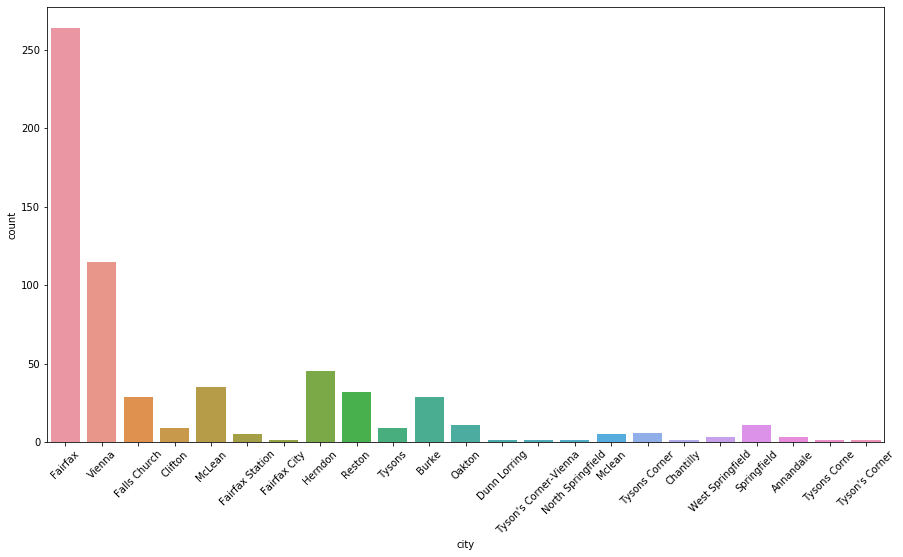

In [185]:
#Cities
plt.figure(figsize=(15, 8))
chart = sns.countplot(df['city'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [186]:
#Category breakdown (calling it genre vs category to avoid confusing it with categorical variables)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_genre = df[['category1', 'category2', 'category3']]
df_genre.stack().value_counts().to_frame()

,0
Pizza,58
American (Traditional),52
American (New),49
Sandwiches,49
Chinese,47
Seafood,42
Sushi Bars,41
Breakfast & Brunch,40
Italian,39
Japanese,36


In [187]:
length = len(df_genre.stack().value_counts())
print(f'Total of {length} genres displayed. ')

Total of 130 genres displayed. 


In [188]:
df_genre.stack().value_counts().head(10)

Pizza                     58
American (Traditional)    52
American (New)            49
Sandwiches                49
Chinese                   47
Seafood                   42
Sushi Bars                41
Breakfast & Brunch        40
Italian                   39
Japanese                  36
dtype: int64

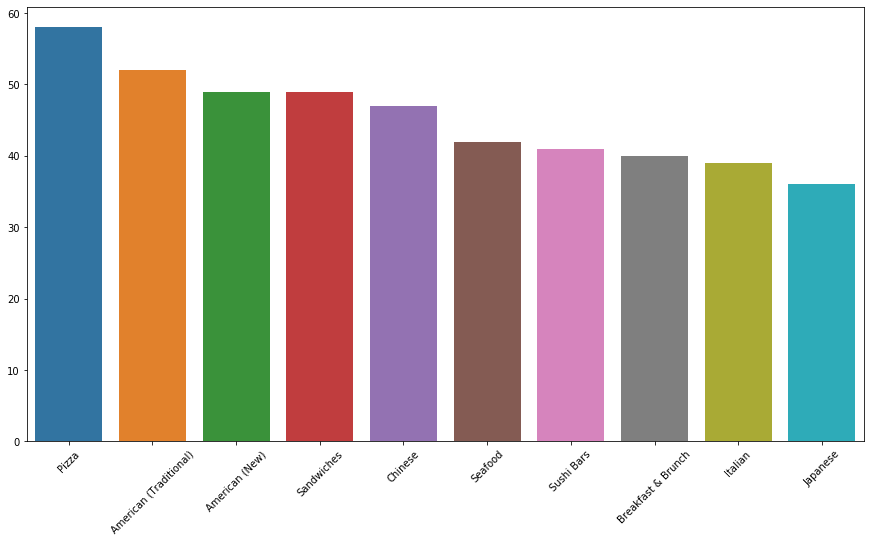

In [189]:
#Top 10 genres in Fairfax area
plt.figure(figsize=(15, 8))
chart = sns.barplot(x=df_genre.stack().value_counts().head(10).index, y = df_genre.stack().value_counts().head(10))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

# Discovering the gems of Fairfax (must trys)

In [190]:
#Filter out Fairfax
df_fairfax = df[df['city'] == 'Fairfax']

## Filtering out only 4.5 and higher (also minimum reviews = 50)

In [191]:
df_fairfax_elite = df_fairfax[(df_fairfax['rating'] > 4.0) & (df_fairfax['review_count'] >= 50)]

In [192]:
df_fairfax_elite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 400
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           22 non-null     object 
 1   is_closed      22 non-null     bool   
 2   url            22 non-null     object 
 3   review_count   22 non-null     int64  
 4   categories     22 non-null     object 
 5   rating         22 non-null     float64
 6   coordinates    22 non-null     object 
 7   transactions   22 non-null     object 
 8   price          22 non-null     object 
 9   location       22 non-null     object 
 10  display_phone  22 non-null     object 
 11  distance       22 non-null     float64
 12  address        22 non-null     object 
 13  state          22 non-null     object 
 14  city           22 non-null     object 
 15  zip_code       22 non-null     int64  
 16  genre          22 non-null     object 
 17  category1      22 non-null     object 
 18  category2  

In [193]:
df_genre = df_fairfax_elite[['category1', 'category2', 'category3']]
df_genre.stack().value_counts().to_frame()

,0
Vietnamese,3
Italian,3
Pizza,3
Japanese,2
Breakfast & Brunch,2
Seafood,2
Barbeque,2
Korean,2
Wine Bars,2
Beer Bar,1


Is there a good way to plot this on folium?

In [194]:
def find_category(df, categories):
    '''Filter out rows that contain list of categories
    Input:
    df = dataframe
    categories = list of categories
    '''
    return_df = pd.DataFrame()
    for category in categories:
        temp_df = df[(df['category1']==category) | (df['category2'] == category) | (df['category3'] == category)]
        return_df = pd.concat([return_df, temp_df])
    return return_df.groupby(return_df.index).first()

find_category(df_fairfax_elite, ['Bakeries'])

,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,display_phone,distance,address,state,city,zip_code,genre,category1,category2,category3,transactions1,transactions2,transactions3
300,Victoria's Cakery,False,https://www.yelp.com/biz/victorias-cakery-fair...,113,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,"{'latitude': 38.8463707, 'longitude': -77.3063...",[],2,"{'address1': '10430 Main St', 'address2': '', ...",(703) 273-0800,1355.205846,"['10430 Main St', 'Fairfax, VA 22030']",VA,Fairfax,22030,['Bakeries'],Bakeries,NaN,NaN,NaN,NaN,NaN


Generate a report of the above

In [195]:
find_category(df_fairfax_elite, ['Pizza'])

,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,display_phone,distance,address,state,city,zip_code,genre,category1,category2,category3,transactions1,transactions2,transactions3
5,Havabite Eatery,False,https://www.yelp.com/biz/havabite-eatery-fairf...,308,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.5,"{'latitude': 38.846385, 'longitude': -77.305939}","['pickup', 'delivery']",2,"{'address1': '10416 Main St', 'address2': '', ...",(703) 591-2244,1378.560425,"['10416 Main St', 'Fairfax, VA 22030']",VA,Fairfax,22030,"['Greek', 'Pizza', 'Italian']",Greek,Pizza,Italian,pickup,delivery,NaN
8,Pomodoro,False,https://www.yelp.com/biz/pomodoro-fairfax?adju...,536,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 38.86705, 'longitude': -77.36806}",['delivery'],2,"{'address1': '12152 Fairfax Towne Ctr', 'addre...",(703) 273-7405,4700.199300,"['12152 Fairfax Towne Ctr', 'Fairfax, VA 22033']",VA,Fairfax,22033,"['Pizza', 'Italian']",Pizza,Italian,NaN,delivery,NaN,NaN
109,Lil Italian Pizza,False,https://www.yelp.com/biz/lil-italian-pizza-fai...,73,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 38.8439591, 'longitude': -77.2918...",['delivery'],1,"{'address1': '10014 Main St', 'address2': '', ...",(703) 591-3315,2440.083785,"['10014 Main St', 'Fairfax, VA 22031']",VA,Fairfax,22031,"['Pizza', 'Italian']",Pizza,Italian,NaN,delivery,NaN,NaN


In [196]:
find_category(df_fairfax_elite, ['Thai'])

,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,display_phone,distance,address,state,city,zip_code,genre,category1,category2,category3,transactions1,transactions2,transactions3


In [197]:
df_fairfax_elite

,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,display_phone,distance,address,state,city,zip_code,genre,category1,category2,category3,transactions1,transactions2,transactions3
0,21 Great American Bistro,False,https://www.yelp.com/biz/21-great-american-bis...,557,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 38.8467363, 'longitude': -77.3054...",['delivery'],2,"{'address1': '10427 North St', 'address2': 'St...",(703) 591-0146,1374.147099,"['10427 North St', 'Ste 102', 'Fairfax, VA 220...",VA,Fairfax,22030,"['American (New)', 'Cocktail Bars']",American (New),Cocktail Bars,NaN,delivery,NaN,NaN
3,Choong Man Chicken - Fairfax,False,https://www.yelp.com/biz/choong-man-chicken-fa...,435,"[{'alias': 'chicken_wings', 'title': 'Chicken ...",4.5,"{'latitude': 38.86676, 'longitude': -77.27454}","['pickup', 'delivery']",2,"{'address1': '9528 Lee Hwy', 'address2': '', '...",(703) 772-0072,3740.989609,"['9528 Lee Hwy', 'Fairfax, VA 22031']",VA,Fairfax,22031,"['Chicken Wings', 'Korean']",Chicken Wings,Korean,NaN,pickup,delivery,NaN
4,Meokja Meokja,False,https://www.yelp.com/biz/meokja-meokja-fairfax...,492,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.5,"{'latitude': 38.8642119, 'longitude': -77.2768...","['pickup', 'delivery']",2,"{'address1': '9619 Fairfax Blvd', 'address2': ...",(571) 459-2875,3449.782403,"['9619 Fairfax Blvd', 'Fairfax, VA 22030']",VA,Fairfax,22030,"['Korean', 'Barbeque']",Korean,Barbeque,NaN,pickup,delivery,NaN
5,Havabite Eatery,False,https://www.yelp.com/biz/havabite-eatery-fairf...,308,"[{'alias': 'greek', 'title': 'Greek'}, {'alias...",4.5,"{'latitude': 38.846385, 'longitude': -77.305939}","['pickup', 'delivery']",2,"{'address1': '10416 Main St', 'address2': '', ...",(703) 591-2244,1378.560425,"['10416 Main St', 'Fairfax, VA 22030']",VA,Fairfax,22030,"['Greek', 'Pizza', 'Italian']",Greek,Pizza,Italian,pickup,delivery,NaN
6,Bartaco Mosaic,False,https://www.yelp.com/biz/bartaco-mosaic-fairfa...,679,"[{'alias': 'tacos', 'title': 'Tacos'}]",4.5,"{'latitude': 38.871345, 'longitude': -77.23046}",['delivery'],2,"{'address1': '2920 District Ave', 'address2': ...",(571) 549-8226,7560.195211,"['2920 District Ave', 'Ste 120', 'Fairfax, VA ...",VA,Fairfax,22031,['Tacos'],Tacos,NaN,NaN,delivery,NaN,NaN
7,California Shabu Shabu,False,https://www.yelp.com/biz/california-shabu-shab...,332,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 38.869541646777, 'longitude': -77...",['delivery'],2,"{'address1': '3081 Nutley St', 'address2': '',...",(571) 210-2252,4958.712100,"['3081 Nutley St', 'Fairfax, VA 22031']",VA,Fairfax,22031,"['Japanese', 'Hot Pot']",Japanese,Hot Pot,NaN,delivery,NaN,NaN
8,Pomodoro,False,https://www.yelp.com/biz/pomodoro-fairfax?adju...,536,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 38.86705, 'longitude': -77.36806}",['delivery'],2,"{'address1': '12152 Fairfax Towne Ctr', 'addre...",(703) 273-7405,4700.199300,"['12152 Fairfax Towne Ctr', 'Fairfax, VA 22033']",VA,Fairfax,22033,"['Pizza', 'Italian']",Pizza,Italian,NaN,delivery,NaN,NaN
13,Pho Bytes,False,https://www.yelp.com/biz/pho-bytes-fairfax?adj...,65,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.5,"{'latitude': 38.851128, 'longitude': -77.333478}","['pickup', 'delivery']",nan,"{'address1': '11211 Lee Hwy', 'address2': 'Ste...",(703) 279-3403,1649.375992,"['11211 Lee Hwy', 'Ste A&B', 'Fairfax, VA 22030']",VA,Fairfax,22030,"['Vietnamese', 'Noodles', 'Seafood']",Vietnamese,Noodles,Seafood,pickup,delivery,NaN
15,Ariake,False,https://www.yelp.com/biz/ariake-fairfax?adjust...,103,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 38.83832, 'longitude': -77.24589}",[],2,"{'address1': '8708 Little River Turnpike', 'ad...",(703) 323-9006,6344.231416,"['8708 Little River Turnpike', 'Fairfax, VA 22...",VA,Fairfax,22031,"['Japanese', 'Sushi Bars']",Japanese,Sushi Bars,NaN,NaN,NaN,NaN
17,High Side,False,https://www.yelp.com/biz/h

In [212]:
#Of interest.  Save to excel
df_fairfax_elite.loc[[0, 5, 6, 7, 8, 13, 15, 17, 19, 22, 26, 35, 40, 83, 109, 221, 300, 322, 400]].to_excel('Fairfax Must Try.xlsx')